In [2]:
# default_exp molmap.gene.distance

# molmap.gene

> Gene feature processing using MolMap

# Add feature sums

The data we have in mind is a $(N, M)$ matrix, with $N$ being the number of genes and $M$ the number of features.

Here we expand the features by calculating the sums of each two features, this will result in a $(N, M^2)$ matrix. 

and split 

In [1]:
import umap
import numpy as np
import pandas as pd
from lapjv import lapjv
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster, linkage
%config Completer.use_jedi = False

no need to untar the archive file

In [10]:
file_name = "/mnt/storage2/molmap_features/gene/input/All-TCGA-sample_log2expression-matrix.csv"

data_T = pd.read_csv(file_name, header = 0, index_col = 0)
data_T.shape

(16988, 17750)

we have 16,988 samples and 17,750 genes.

But what exactly are the data?

In [11]:
data_T.tail()

,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,DUS4L-BCAP29,AC016394.2,AL357079.3,AL357874.3,C8orf44,AL354833.1,AL133351.4,AC073611.1,AL592295.6,AP006621.6
ID-16984,3.764505,4.632960,1.209828,0.796349,0.415759,2.363564,3.848938,2.812970,3.452951,0.387693,...,-0.715960,0.378290,0.513895,-0.902659,1.102591,-4.970300,-1.572179,-4.921390,2.189508,-3.689660
ID-16985,3.248838,4.315516,1.345283,-0.565759,1.671882,4.475039,3.541577,2.197991,2.311590,-0.399350,...,-0.171531,-0.310790,1.450274,-2.346665,1.351572,-2.982791,1.263215,-2.398969,2.288447,-2.031504
ID-16986,4.461764,5.514662,0.523963,1.932893,0.822118,3.998927,4.824391,-0.060397,3.204908,-0.130523,...,1.106750,-0.539729,-1.962969,-1.475936,-0.513337,-5.853084,-1.683159,-3.601212,1.581448,-1.778432
ID-16987,3.910877,5.442280,1.382612,1.143655,1.352081,4.442479,3.356186,3.216362,4.253815,-0.076128,...,-0.540778,1.870621,-0.993379,-0.828025,3.297030,-3.503078,-0.405069,-2.111539,1.609991,-3.070967
ID-16988,2.735847,4.452378,1.527921,0.222805,1.103733,4.433527,3.923216,1.661750,3.816047,1.441377,...,0.485015,0.876330,0.919226,0.517528,1.286231,-2.780909,-1.229382,-2.610874,2.402749,-2.554697


In [12]:
data_T.index

Index(['ID-1', 'ID-2', 'ID-3', 'ID-4', 'ID-5', 'ID-6', 'ID-7', 'ID-8', 'ID-9',
       'ID-10',
       ...
       'ID-16979', 'ID-16980', 'ID-16981', 'ID-16982', 'ID-16983', 'ID-16984',
       'ID-16985', 'ID-16986', 'ID-16987', 'ID-16988'],
      dtype='object', length=16988)

In [13]:
data_T.columns

Index(['TSPAN6', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2', 'GCLC',
       'NFYA', 'STPG1',
       ...
       'DUS4L-BCAP29', 'AC016394.2', 'AL357079.3', 'AL357874.3', 'C8orf44',
       'AL354833.1', 'AL133351.4', 'AC073611.1', 'AL592295.6', 'AP006621.6'],
      dtype='object', length=17750)

# Split and save data

Even with only two percent of the original features, we now have already near two million generated features. This is too much for the distance matrix computation, so we gonna split the data into smaller blocks and compute the distance matrix for each block, one by one.

The size of each block will be determined by the computation power.

On our machine, UMAP can handle $100000*10000$ matrices without issue. This is what we are aiming at.

the remainder should be as small as possible

In [45]:
dataX.shape[1] % 22000

1731

In [46]:
BATCH = 22000
split = np.ceil(1717731 / BATCH)

In [47]:
split

79.0

In [48]:
!mkdir protein

mkdir: cannot create directory ‘protein’: File exists


In [49]:
for i in range(int(split)):
    print(f'======> {i}')
    _d = dataX.iloc[:, i*BATCH:(i+1)*BATCH]
    d = _d.values
    np.save(f'protein/t_{i}_descriptor.npy', d)

======> 0
======> 1
======> 2
======> 3
======> 4
======> 5
======> 6
======> 7
======> 8
======> 9
======> 10
======> 11
======> 12
======> 13
======> 14
======> 15
======> 16
======> 17
======> 18
======> 19
======> 20
======> 21
======> 22
======> 23
======> 24
======> 25
======> 26
======> 27
======> 28
======> 29
======> 30
======> 31
======> 32
======> 33
======> 34
======> 35
======> 36
======> 37
======> 38
======> 39
======> 40
======> 41
======> 42
======> 43
======> 44
======> 45
======> 46
======> 47
======> 48
======> 49
======> 50
======> 51
======> 52
======> 53
======> 54
======> 55
======> 56
======> 57
======> 58
======> 59
======> 60
======> 61
======> 62
======> 63
======> 64
======> 65
======> 66
======> 67
======> 68
======> 69
======> 70
======> 71
======> 72
======> 73
======> 74
======> 75
======> 76
======> 77
======> 78


In [68]:
d.shape

(268, 1731)

In [50]:
cos00 = np.load('cosine/diag_0_0_cosine_dist.npy')
cos11 = np.load('cosine/diag_1_1_cosine_dist.npy')
cos10 = np.load('cosine/cross_1_0_cosine_dist.npy')

In [51]:
cos11.shape

(22000, 22000)

In [52]:
combined = np.empty((44000, 44000))

In [53]:
combined[:22000, :22000] = cos00
combined[22000:, :22000] = cos10
combined[22000:, 22000:] = cos11

In [54]:
combined[1, 3] == combined[3, 1]

True

In [55]:
import umap


In [56]:
reducer = umap.UMAP(metric='cosine', min_dist=0.1)

In [57]:
embedding = reducer.fit_transform(combined)
embedding.shape


(44000, 2)

In [58]:
embedding[:5, :5]

array([[12.616543, 11.864838],
       [16.954111, 10.39153 ],
       [16.946775, 10.392755],
       [16.93592 , 10.052655],
       [16.9383  , 10.051486]], dtype=float32)

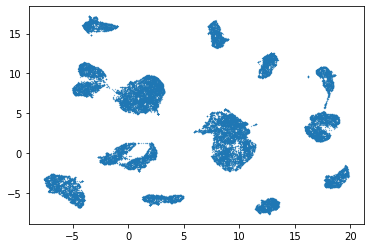

In [59]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.05);

The cosine distance between two vectors

$$ \frac{u \cdot v}{{||u||}_2 {||v||}_2}$$

In [73]:
from numpy import dstack, meshgrid, linspace, sqrt
grid = dstack(meshgrid(linspace(0, 1, int(sqrt(size * 2))),
                       linspace(0, 1, int(sqrt(size * 2))))).reshape(-1, 2)


In [74]:
grid.shape

(43681, 2)

In [ ]:
from scipy.spatial.distance import cdist
cost = cdist(embedding, grid, "sqeuclidean")
